# Knock Airport Weather
**Andre Hoarau**
<p align="center">
<img src ="https://lh3.googleusercontent.com/p/AF1QipM-_2OqC1gB8hQXsYan3rsvs09b1yekOymbsiAI=s680-w680-h510"
</p>

## The objective of this notebook is to develop a progamme using data obtained from Knock Airport in Mayo Ireland: [Here](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv)
## The program(s) will plot
    * The temperature
    * The mean temperature each day
    * The mean temperature each month
    * The windspeed
    * The rolling windspeed over 24 hours 
    * The max windspeed each day 
    * The monthly mean of the daily max windspeeds.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib widget
import mpld3
from matplotlib.ticker import NullFormatter
import matplotlib.dates as mdates
knock_data= "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df= pd.read_csv(knock_data, skiprows=22)
df.head()

C:\Users\andre.hoarau\AppData\Local\Temp\ipykernel_7064\2481952207.py:9: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(knock_data, skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [2]:
# I want to tidy the DF and remove any temp that is 0 from looking at it if it wasn't recorded it was left as 0. Whilst sometimes this might be true at lower temperatrues it appears to go closer to decimal places and therefore I feel this is efficient enough to not lose too much data.
df.drop(df.loc[df["temp"]==0].index, inplace=True)

In [3]:
df.head

<bound method NDFrame.head of                      date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  \
0       10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0   
1       31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0   
2       31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0   
3       31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0   
4       31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0   
...                   ...  ...  ...    ...   ...    ...   ...    ...    ...   
249133  31-dec-2024 20:00    0  0.0      0   7.3      0   6.1    4.6    8.5   
249134  31-dec-2024 21:00    0  0.4      0   6.2      0   5.5    4.6    8.5   
249135  31-dec-2024 22:00    0  0.0      0   6.5      0   5.3    3.7    7.9   
249136  31-dec-2024 23:00    0  0.1      0   5.8      0   4.7    3.2    7.7   
249137  01-jan-2025 00:00    0  0.2      0   5.2      0   4.2    2.8    7.4   

        rhum  ... ind

In [4]:
# Convert the first column to datetime, if needed
df["date"] = pd.to_datetime(df["date"])

# Set the datetime column as the index
df_dateindex= df.set_index("date")

# Resample to daily frequency at midnight and use the mean (or any other aggregation function)
df_daily = df_dateindex.resample("D").first()  # 'first' keeps the first row of each day, which is 00:00 if data is hourly

# Reset the index if you want "date" to be a column again
df_daily = df_daily.reset_index()

print(df_daily)

C:\Users\andre.hoarau\AppData\Local\Temp\ipykernel_7064\3251773801.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


            date  ind  rain  ind.1  temp  ind.2  wetb  dewpt  vappr   rhum  \
0     1996-04-10  0.0   0.0    0.0  11.5    0.0   8.1    3.9    0.0    0.0   
1     1996-04-11  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
2     1996-04-12  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
3     1996-04-13  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
4     1996-04-14  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
...          ...  ...   ...    ...   ...    ...   ...    ...    ...    ...   
10489 2024-12-28  0.0   0.0    0.0   8.2    0.0   8.2    8.2   10.9  100.0   
10490 2024-12-29  0.0   0.0    0.0   7.0    0.0   6.6    6.1    9.4   94.0   
10491 2024-12-30  0.0   0.0    0.0   8.5    0.0   8.0    7.4   10.3   93.0   
10492 2024-12-31  0.0   0.0    0.0   9.4    0.0   9.0    8.5   11.2   95.0   
10493 2025-01-01  0.0   0.2    0.0   5.2    0.0   4.2    2.8    7.4   84.0   

       ... ind.3  wdsp ind.4  wddir    ww     w  sun    vis  cl

In [5]:
df_daily.dropna()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10,0.0,0.0,0.0,11.5,0.0,8.1,3.9,0.0,0.0,...,0.0,0,0.0,0,25,81,0.0,35000,32,5
112,1996-07-31,0.0,0.0,0.0,11.5,0.0,11.1,10.7,0.0,0.0,...,0.0,0,0.0,0,25,82,0.0,40000,45,5
113,1996-08-01,0.0,0.0,0.0,9.7,0.0,9.0,8.3,0.0,0.0,...,0.0,0,0.0,0,1,81,0.0,35000,999,3
114,1996-08-02,0.0,0.0,0.0,10.3,0.0,9.6,8.9,11.4,91.0,...,2.0,4,2.0,260,1,82,0.0,35000,30,6
115,1996-08-03,0.0,0.0,0.0,12.1,0.0,11.7,11.3,13.4,95.0,...,2.0,5,2.0,230,2,11,4.9,40000,39,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10489,2024-12-28,0.0,0.0,0.0,8.2,0.0,8.2,8.2,10.9,100.0,...,2.0,8,2.0,190,,,0.0,,0,8
10490,2024-12-29,0.0,0.0,0.0,7.0,0.0,6.6,6.1,9.4,94.0,...,2.0,10,2.0,240,,,0.0,,0,8
10491,2024-12-30,0.0,0.0,0.0,8.5,0.0,8.0,7.4,10.3,93.0,...,2.0,11,2.0,220,,,0.0,,0,8
10492,2024-12-31,0.0,0.0,0.0,9.4,0.0,9.0,8.5,11.2,95.0,...,2.0,20,2.0,210,,,0.0,,0,8


c:\Users\andre.hoarau\AppData\Local\anaconda3\Lib\site-packages\mpld3\mplexporter\exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


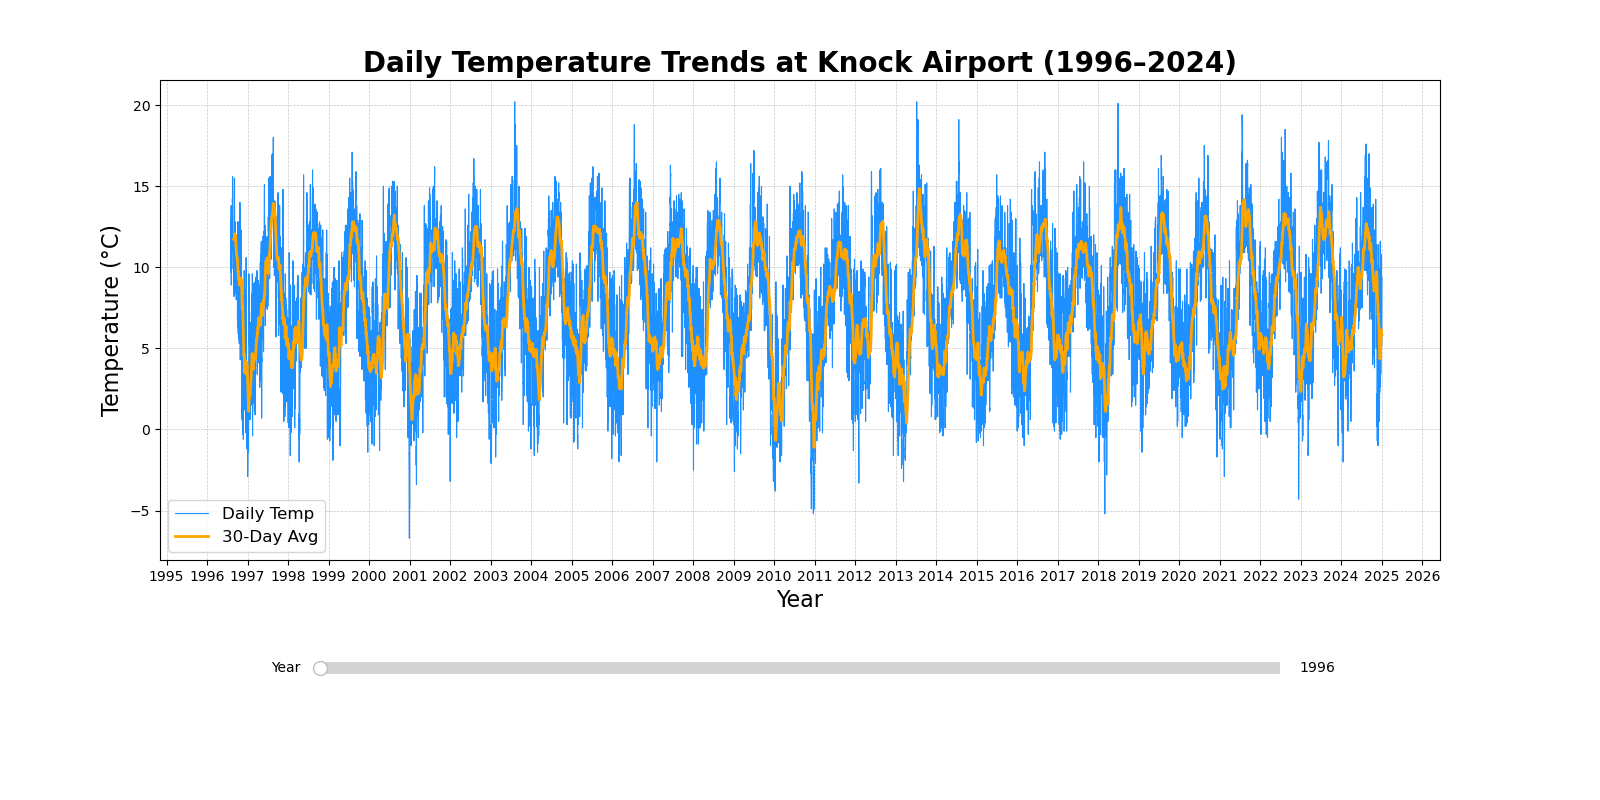

In [6]:

# Assuming df_daily is already defined and contains 'date' and 'temp' columns
date = df_daily["date"]
temp = df_daily["temp"]

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(16, 8))  # Adjusted size for better readability

# Adjust the layout to center the plot
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.3, top=0.9)  # Adjust margins

# Plot the temperature and rolling average
ax.plot(date, temp, color='dodgerblue', linewidth=0.8, label='Daily Temp')
df_daily['rolling_avg'] = temp.rolling(window=30).mean()
ax.plot(date, df_daily['rolling_avg'], color='orange', linewidth=2, label='30-Day Avg')

# Customize x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_title("Daily Temperature Trends at Knock Airport (1996–2024)", fontsize=20, fontweight='bold')
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Temperature (°C)", fontsize=16)
ax.legend(fontsize=12)
ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a slider for zooming
ax_slider = plt.axes([0.2, 0.15, 0.6, 0.03])  # Adjust slider position: [left, bottom, width, height]
slider = Slider(ax_slider, 'Year', valmin=date.min().year, valmax=date.max().year - 1, valinit=date.min().year, valstep=1)

# Function to update the plot when slider is moved
def update(val):
    start_year = int(slider.val)
    end_year = start_year + 1
    ax.set_xlim(pd.Timestamp(f"{start_year}-01-01"), pd.Timestamp(f"{end_year}-01-01"))
    fig.canvas.draw_idle()

slider.on_changed(update)
# Save the figure as an interactive HTML file using mpld3
mpld3.save_html(fig, "Daily Temperature Trends at Knock Airport (1996–2024)")
plt.show()


### Overall I feel we can see that it's not the best to plot this much data on one plot.
### Lets keep that in mind for the next part, the mean temperature each day.


In [7]:
# We take our indexed DF and resample on the daily with the average value.

df_daily_average = df_dateindex["temp"].resample("D").mean()

# We will convert this series back to a df reset the index.
df_daily_average = df_daily_average.dropna().reset_index(name="temp")



In [8]:
# Now lets make our plot 
datedaily = df_daily_average["date"]


c:\Users\andre.hoarau\AppData\Local\anaconda3\Lib\site-packages\mpld3\mplexporter\exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


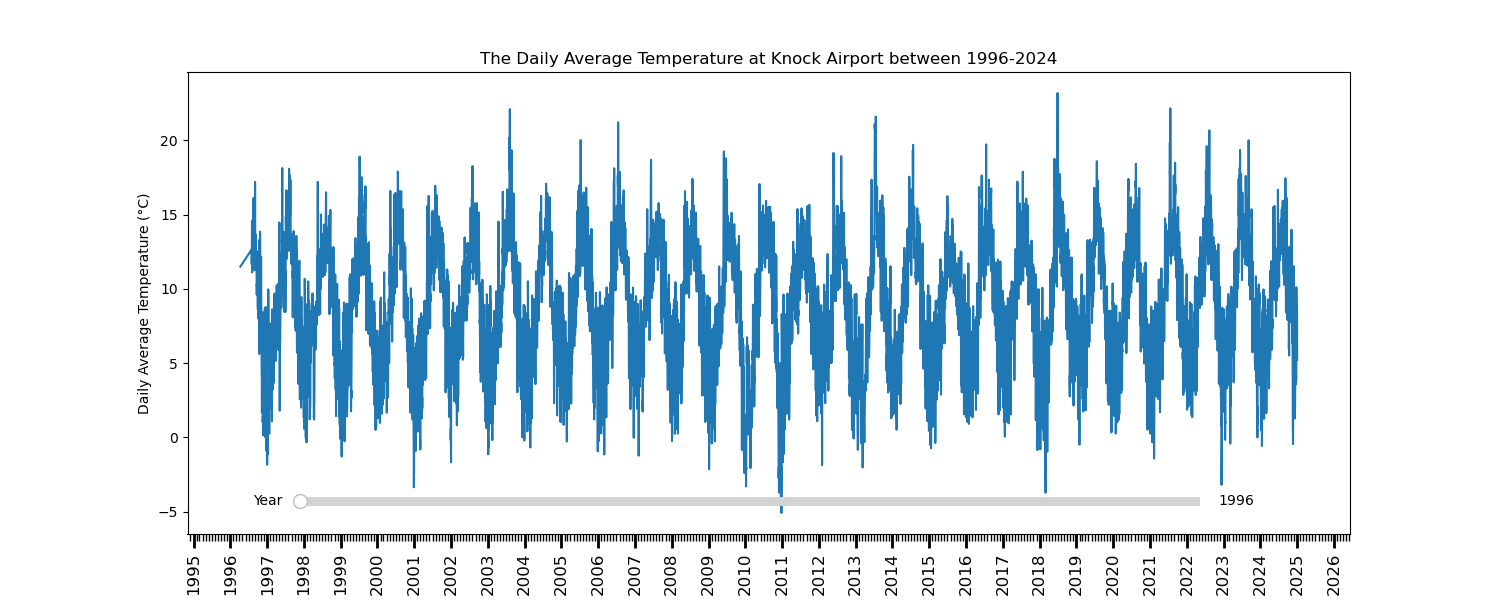

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.widgets import Slider
from matplotlib.ticker import NullFormatter
import mpld3

# Assuming df_daily_average is already defined and contains 'date' and 'temp' columns
datedaily = df_daily_average["date"]
daily_average_temp = df_daily_average["temp"]

# Create the figure
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_xlabel("Date")
ax.set_ylabel("Daily Average Temperature (°C)")
ax.set_title("The Daily Average Temperature at Knock Airport between 1996-2024")

# Plot the data
ax.plot(datedaily, daily_average_temp)

# Format the x-axis to show major ticks for years and minor ticks for months
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(NullFormatter())

# Customize the tick appearance
plt.tick_params(axis='x', which='major', length=10, width=2, labelsize=12)
plt.tick_params(axis='x', which='minor', length=5, width=1)
plt.xticks(rotation=90)
# Add a slider for zooming
ax_slider = plt.axes([0.2, 0.15, 0.6, 0.03])
slider = Slider(ax_slider, 'Year', valmin=datedaily.min().year, valmax=datedaily.max().year - 1, valinit=datedaily.min().year, valstep=1)

# Function to update the plot when slider is moved
def update(val):
    start_year = int(slider.val)
    end_year = start_year + 1
    ax.set_xlim(pd.Timestamp(f"{start_year}-01-01"), pd.Timestamp(f"{end_year}-01-01"))
    fig.canvas.draw_idle()

slider.on_changed(update)

# Save the figure as an interactive HTML file using mpld3
mpld3.save_html(fig, "The_Daily_Average_Temperature_at_Knock_Airport_1996_2024.html")

# Show the plot
plt.show()



### Now we will look at the mean temperature each month.

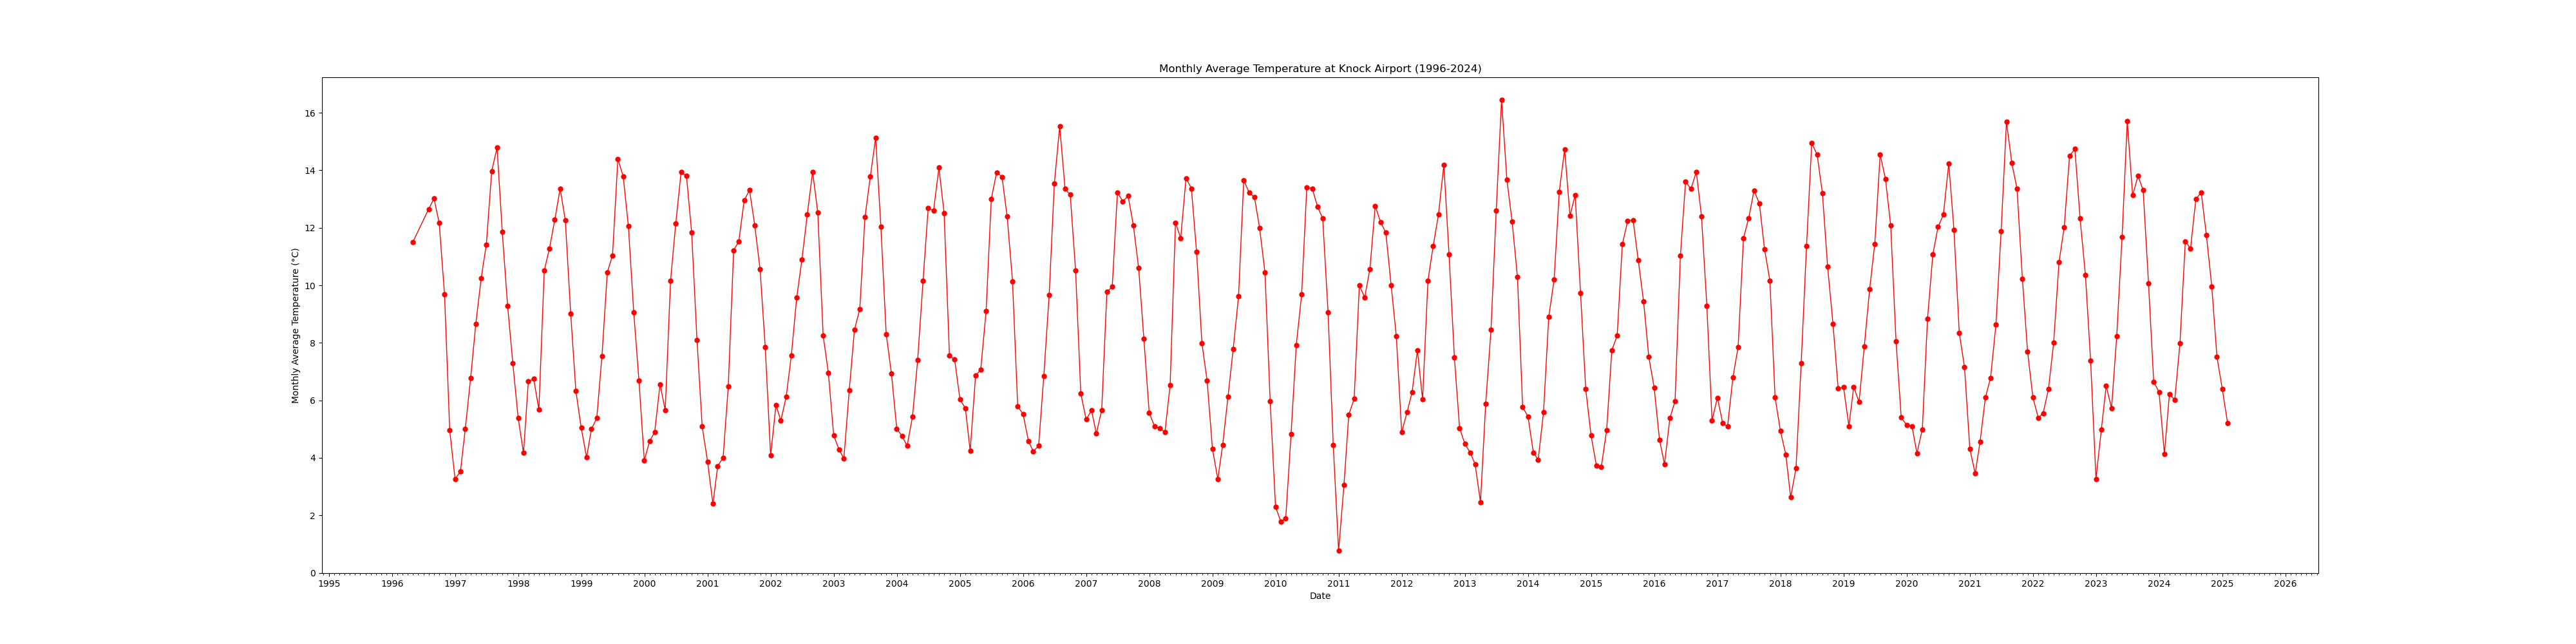

In [10]:

month_average = df_dateindex["temp"].resample("ME").mean()
# Drop NaN values and reset the index
month_average = month_average.dropna().reset_index(name="temp")

# Set up variables
datemonth = month_average["date"]
monthtemp = month_average["temp"]

# Plot
fig = plt.figure(figsize=(40, 10))
plt.xlabel("Date")
plt.ylabel("Monthly Average Temperature (°C)")
plt.title("Monthly Average Temperature at Knock Airport (1996-2024)")

ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks at the start of each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks at the start of each month
ax.xaxis.set_minor_formatter(NullFormatter())  # Remove minor tick labels

plt.plot(datemonth, monthtemp, marker='o', color='red', linestyle='-', linewidth=1, markersize=5)
plt.show()



### Next we will look at the windspeed
* In this data set the wind speed (wdsp) is the average wind speed per day in knots.

c:\Users\andre.hoarau\AppData\Local\anaconda3\Lib\site-packages\mpld3\mplexporter\exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


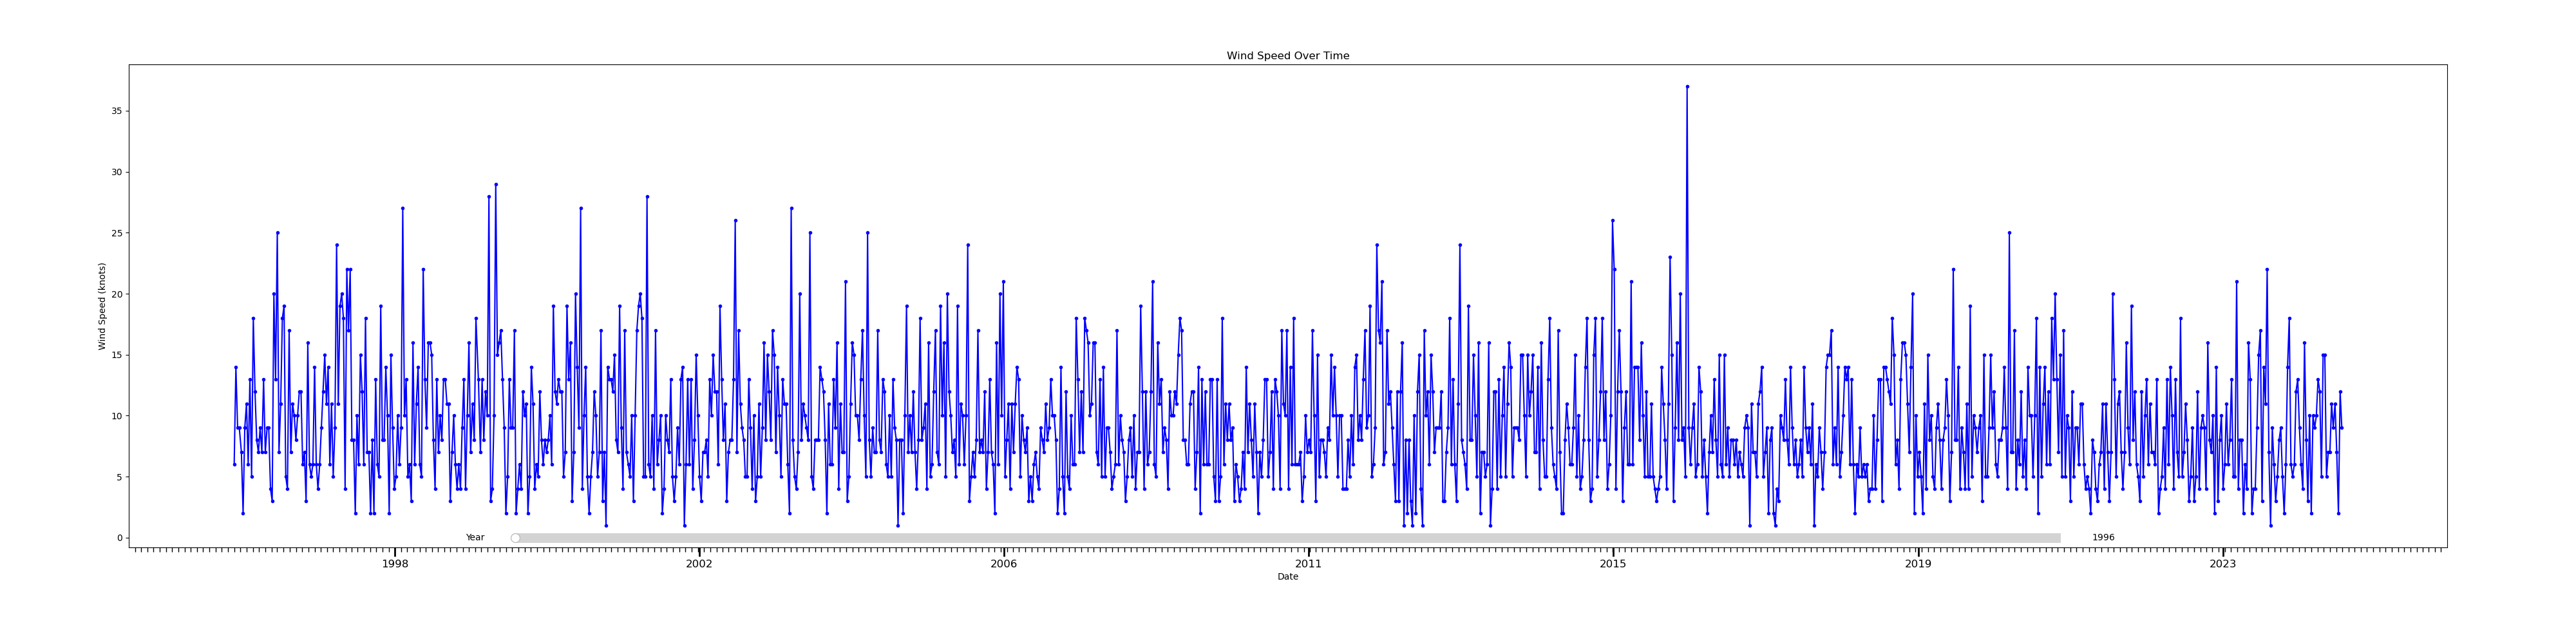

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.ticker import NullFormatter  # Correct import
import mpld3

# Assuming df is already defined and contains 'date' and 'wdsp' columns

# Convert 'wdsp' to numeric and remove rows where wind speed is 0 (treated as NaN)
df["wdsp"] = pd.to_numeric(df["wdsp"], errors='coerce')
df.drop(df.loc[df["wdsp"] == 0].index, inplace=True)

# Subsample the data (every 200th row for visualization)
df_subsampled = df.iloc[::200]

# Create the figure
fig, ax = plt.subplots(figsize=(40, 10))

# Adjust layout to reduce space on the right side and make it more centered
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.9)

ax.set_xlabel("Date")
ax.set_ylabel("Wind Speed (knots)")
ax.set_title("Wind Speed Over Time")

# Plot the data
ax.plot(df_subsampled["date"], df_subsampled["wdsp"], linestyle='-', marker=".", color='b')

# Format the x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Make sure there are integer ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks at the start of each month
ax.xaxis.set_minor_formatter(NullFormatter())  # Remove minor tick labels

# Customize tick appearance
plt.tick_params(axis='x', which='major', length=10, width=2, labelsize=12)
plt.tick_params(axis='x', which='minor', length=5, width=1)

# Add a slider for zooming functionality
ax_slider = plt.axes([0.2, 0.15, 0.6, 0.03])  # Adjust slider position: [left, bottom, width, height]
slider = Slider(ax_slider, 'Year', valmin=df_subsampled["date"].min().year, valmax=df_subsampled["date"].max().year - 1, valinit=df_subsampled["date"].min().year, valstep=1)

# Function to update the plot when slider is moved
def update(val):
    start_year = int(slider.val)
    end_year = start_year + 1
    ax.set_xlim(pd.Timestamp(f"{start_year}-01-01"), pd.Timestamp(f"{end_year}-01-01"))
    fig.canvas.draw_idle()

slider.on_changed(update)

# Save the figure as an interactive HTML file using mpld3
mpld3.save_html(fig, "Wind_Speed_Over_Time.html")

# Show the plot
plt.show()


### Next we will look at the rolling windspeed over 24 hours.
* This utilises the ```.rolling()``` function within pandas applying a rolling window calculation to data.

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


c:\Users\andre.hoarau\AppData\Local\anaconda3\Lib\site-packages\mpld3\mplexporter\exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


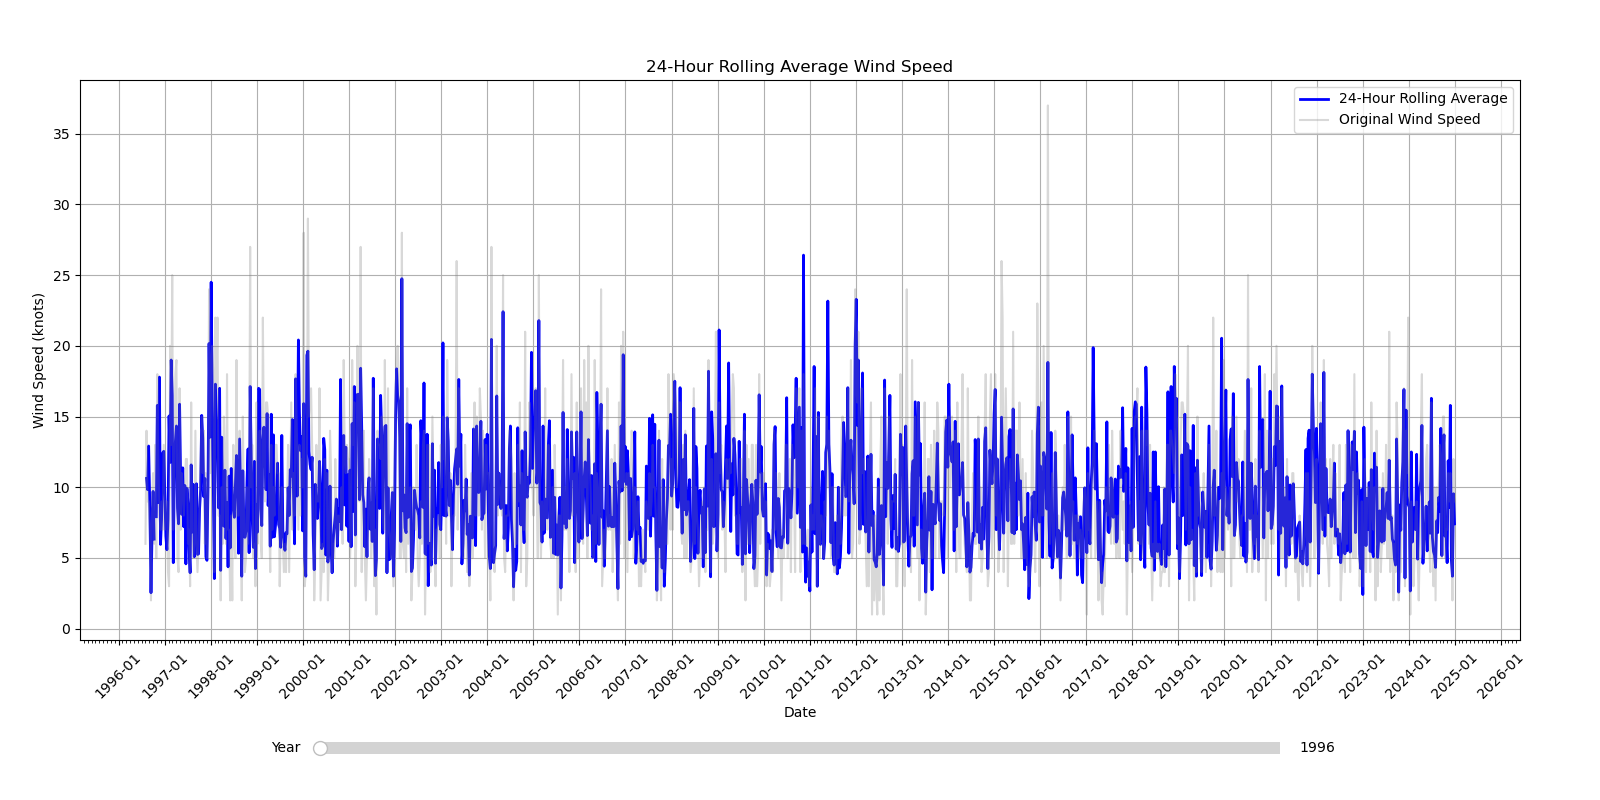

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib.dates as mdates
from matplotlib.ticker import NullFormatter
import mpld3

print(df.columns)  # Check the column names to confirm 'date' exists

# Ensure 'date' column is datetime type
if 'date' in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors='coerce')  # Convert to datetime if needed
else:
    raise KeyError("The 'date' column is missing from the DataFrame")

df["wdsp"] = pd.to_numeric(df["wdsp"], errors='coerce')  # Ensure numeric conversion
df.drop(df.loc[df["wdsp"] == 0].index, inplace=True)  # Remove wind speed 0 values

# Set the 'date' column as the index
df.set_index("date", inplace=True)

# Calculate the 24-hour rolling average for wind speed
df["rolling_wdsp"] = df["wdsp"].rolling(window=24).mean()

# Subsample the data for readability (every 200th row)
df_subsampled = df.iloc[::200]

# Create the figure
fig, ax = plt.subplots(figsize=(16, 8))

# Adjust layout to reduce space on the right side and make it more centered
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.9)

# Plot 24-hour rolling average
ax.plot(df_subsampled.index, df_subsampled["rolling_wdsp"], label="24-Hour Rolling Average", color="blue", linewidth=2)

# Plot original wind speed (optional, with reduced alpha for clarity)
ax.plot(df_subsampled.index, df_subsampled["wdsp"], alpha=0.3, label="Original Wind Speed", color="gray")

# Customize x-axis labels
ax.set_xlabel("Date")
ax.set_ylabel("Wind Speed (knots)")
ax.set_title("24-Hour Rolling Average Wind Speed")

# Format x-axis to show years and months, and rotate labels for readability
ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks at the start of each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format major ticks as 'Year-Month'
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks at the start of each month
ax.xaxis.set_minor_formatter(NullFormatter())  # Remove minor tick labels
plt.xticks(rotation=45)

# Show legend and grid
ax.legend()
ax.grid(True)

# Add a slider for zooming functionality
ax_slider = plt.axes([0.2, 0.05, 0.6, 0.03])  # Adjust slider position: [left, bottom, width, height]
slider = Slider(ax_slider, 'Year', valmin=df_subsampled.index.min().year, 
                valmax=df_subsampled.index.max().year - 1, 
                valinit=df_subsampled.index.min().year, valstep=1)

# Function to update the plot when slider is moved
def update(val):
    start_year = int(slider.val)
    end_year = start_year + 1
    ax.set_xlim(pd.Timestamp(f"{start_year}-01-01"), pd.Timestamp(f"{end_year}-01-01"))
    fig.canvas.draw_idle()

slider.on_changed(update)

# Save the figure as an interactive HTML file using mpld3
mpld3.save_html(fig, "24_Hour_Rolling_Average_Wind_Speed.html")

# Display the plot
plt.show()


### Lastly we will look at the monthly mean of the daily max windspeeds


C:\Users\andre.hoarau\AppData\Local\Temp\ipykernel_7064\885732368.py:5: FutureWarning: 'Me' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_mean_of_daily_max = df_daily_max.resample("Me").mean()


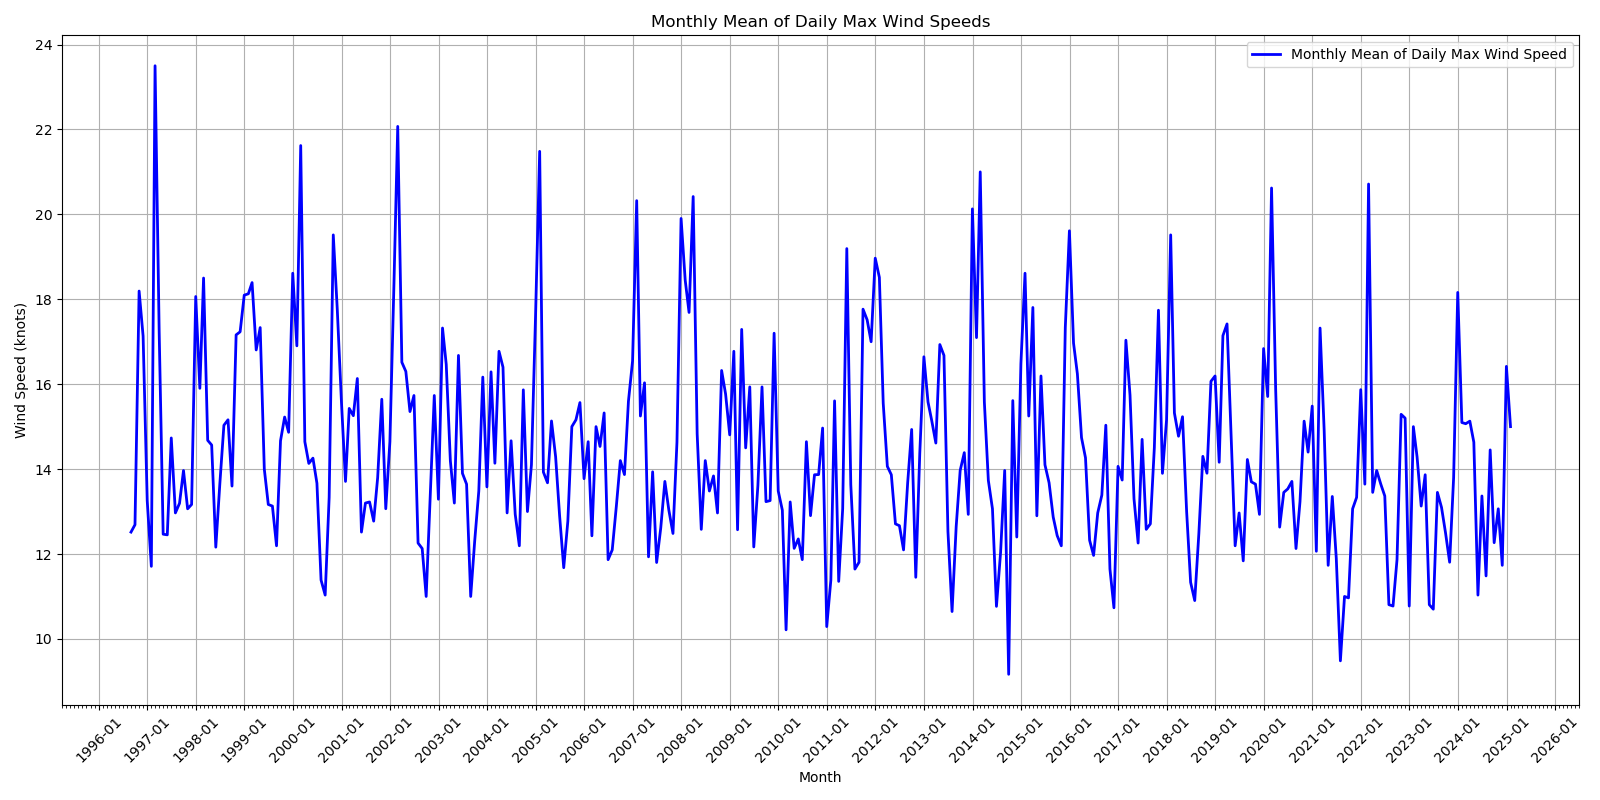

In [13]:
# Perform daily max resampling
df_daily_max = df["wdsp"].resample("D").max()

# Now resample the daily max values to get the monthly mean
df_monthly_mean_of_daily_max = df_daily_max.resample("Me").mean()

# Plotting the result
plt.figure(figsize=(16, 8))
plt.plot(df_monthly_mean_of_daily_max.index, df_monthly_mean_of_daily_max, label="Monthly Mean of Daily Max Wind Speed", color="blue", linewidth=2)

# Customize plot labels and title
plt.xlabel("Month")
plt.ylabel("Wind Speed (knots)")
plt.title("Monthly Mean of Daily Max Wind Speeds")

# Format x-axis labels to show year and month
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks for each year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format major ticks as year-month
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks at each month
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show legend, grid, and layout adjustments
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Save the plot as a PDF
plt.savefig("Monthly Mean of Daily Max Wind Speeds.pdf", format='pdf')



References:
* [Stack overflow on drop](https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value)-This link told me about drop.
* [Skip rows in Pandas](https://www.statology.org/pandas-skip-rows/)- How to skip rows in order to prepare the file. Statology article.
* [pandas.DataFrame.resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)- Pandas documentation I used for resampling.
* [pandas.DataFrame.reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)- Documentation on how to reset the index after the resampling
* [matplotlib.axes.Axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)- Documentation on customisation of axes in matplotlib.
* [Python – Scroll through Plots](https://www.geeksforgeeks.org/python-scroll-through-plots/)- Geeks for geeks article on how to make graphs more readable by being able to scroll.
* [matplotlib.ticker](https://matplotlib.org/stable/api/ticker_api.html)- Matplotlib documentation on how to set major and minor ticks.
* [Pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html)- Matplotlib documentation on using pyplot used to obtain formatting hints. 
* [Assign subset of rows to a Dataframe using loc / iloc](https://stackoverflow.com/questions/76771626/assign-subset-of-rows-to-a-dataframe-using-loc-iloc)- Article from stackoverflow on how to sub sample.
* [Setting x-axis as dates using mdates with matplotlib](https://stackoverflow.com/questions/50702150/setting-x-axis-as-dates-using-mdates-with-matplotlib)- Stackoverflow article on using mdates to format the x-axis dates.
* [How to Plot a Running Average in Python Using matplotlib](https://learnpython.com/blog/average-in-matplotlib/)- Article on how to plot a running average.




# End